In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
data = datasets.load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


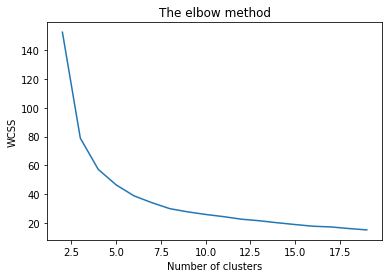

In [4]:
from sklearn.cluster import KMeans
metric = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 200, n_init = 10, random_state = 0)
    kmeans.fit(X.values)
    metric.append(kmeans.inertia_)
plt.plot(range(2, 20), metric)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X.values)

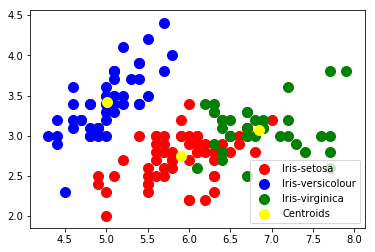

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()